# Trading Strategy 

Making and Testing Trading strategy for Nifty opening prices using the data we processed and from the model we made while [EDA](./EDA.ipynb)

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv('./Indices/Opening_Difference.csv',index_col=0)
prices

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2008-01-15,-38.000000,-284.519532,-290.201171,-24.910156,-236.95996,-0.989990,-17.000000,0.380005,8.960010,17.550293
2008-01-16,-125.700196,-338.179687,-1597.820313,22.060059,163.71973,-21.830078,8.969971,-1.370011,-7.970019,-161.350098
2008-01-17,-74.899902,-200.350586,-426.029297,-178.120118,-300.69043,-58.479980,-34.469971,-2.429992,-24.629980,-127.049805
2008-01-18,0.000000,-18.879883,-457.910156,-31.629882,-9.75976,15.179931,-2.619995,0.449997,-27.135010,-30.200195
2008-01-21,-233.899902,123.929688,211.849609,-87.300293,-307.10938,-40.179931,-40.890015,-3.069993,-56.600000,-202.750000
...,...,...,...,...,...,...,...,...,...,...
2018-08-14,-25.300293,-64.500000,-18.458984,-227.450195,-74.00000,13.290039,-3.439941,0.019989,7.065039,12.100586
2018-08-16,74.400390,-72.250000,-1067.210938,97.879883,-111.50000,-0.120117,-7.580078,-0.549988,3.735059,15.450196
2018-08-17,-3.100097,332.369140,517.460938,-242.500000,79.28125,-20.929688,3.560058,0.479981,10.825000,40.000000


In [3]:
# Norprice = pd.DataFrame()

### Splitting the data 200 -> test 

In [4]:
Train = prices[:-200]
Test = prices[-200:]

In [5]:
Train.head()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2008-01-15,-38.000000,-284.519532,-290.201171,-24.910156,-236.95996,-0.989990,-17.000000,0.380005,8.960010,17.550293
2008-01-16,-125.700196,-338.179687,-1597.820313,22.060059,163.71973,-21.830078,8.969971,-1.370011,-7.970019,-161.350098
2008-01-17,-74.899902,-200.350586,-426.029297,-178.120118,-300.69043,-58.479980,-34.469971,-2.429992,-24.629980,-127.049805
2008-01-18,0.000000,-18.879883,-457.910156,-31.629882,-9.75976,15.179931,-2.619995,0.449997,-27.135010,-30.200195
2008-01-21,-233.899902,123.929688,211.849609,-87.300293,-307.10938,-40.179931,-40.890015,-3.069993,-56.600000,-202.750000


In [6]:
Test.tail()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2018-08-14,-25.300293,-64.50000,-18.458984,-227.450195,-74.00000,13.290039,-3.439941,0.019989,7.065039,12.100586
2018-08-16,74.400390,-72.25000,-1067.210938,97.879883,-111.50000,-0.120117,-7.580078,-0.549988,3.735059,15.450196
2018-08-17,-3.100097,332.36914,517.460938,-242.500000,79.28125,-20.929688,3.560058,0.479981,10.825000,40.000000
2018-08-20,13.199707,-46.11914,-114.791016,39.929687,255.83008,-40.310058,6.880127,0.429993,20.429980,64.949218
2018-08-21,9.300293,-156.53125,396.759766,20.950196,176.89844,47.729980,15.609864,1.740020,17.470020,74.100586


## Making Model

In [7]:
formula = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy+NIFTY_Previous'
model = ols(formula=formula, data = Train).fit()

In [11]:
Train_res = pd.DataFrame(index=Train.index)
Train_res['NIFTY'] = Train["NIFTY"]
Train_res['Pre'] = model.predict(Train)
Train_res.corr()

,NIFTY,Pre
NIFTY,1.000000,0.552794
Pre,0.552794,1.000000


In [14]:
Test_res = pd.DataFrame(index=Test.index)
Test_res['NIFTY'] = Test['NIFTY']
Test_res['Pre'] = model.predict(Test)
Test_res.corr()

,NIFTY,Pre
NIFTY,1.000000,0.483805
Pre,0.483805,1.000000


## Signal Based strategy

### Train Data

In [24]:
Train_res['Share'] = [1 if sign > 0 else -1 for sign in Train_res['Pre']]
Train_res['Profit'] = Train_res['NIFTY'] * Train_res['Share']
Train_res

,NIFTY,Pre,Share,Profit
Date,,,,
2008-01-15,17.550293,0.053668,1,17.550293
2008-01-16,-161.350098,-163.674499,-1,161.350098
2008-01-17,-127.049805,-67.592298,-1,127.049805
2008-01-18,-30.200195,-42.955281,-1,30.200195
2008-01-21,-202.750000,-78.880481,-1,202.750000
...,...,...,...,...
2017-10-27,70.500000,46.969107,1,70.500000
2017-10-30,-8.450196,33.577450,1,-8.450196
2017-10-31,11.050782,-15.075154,-1,-11.050782


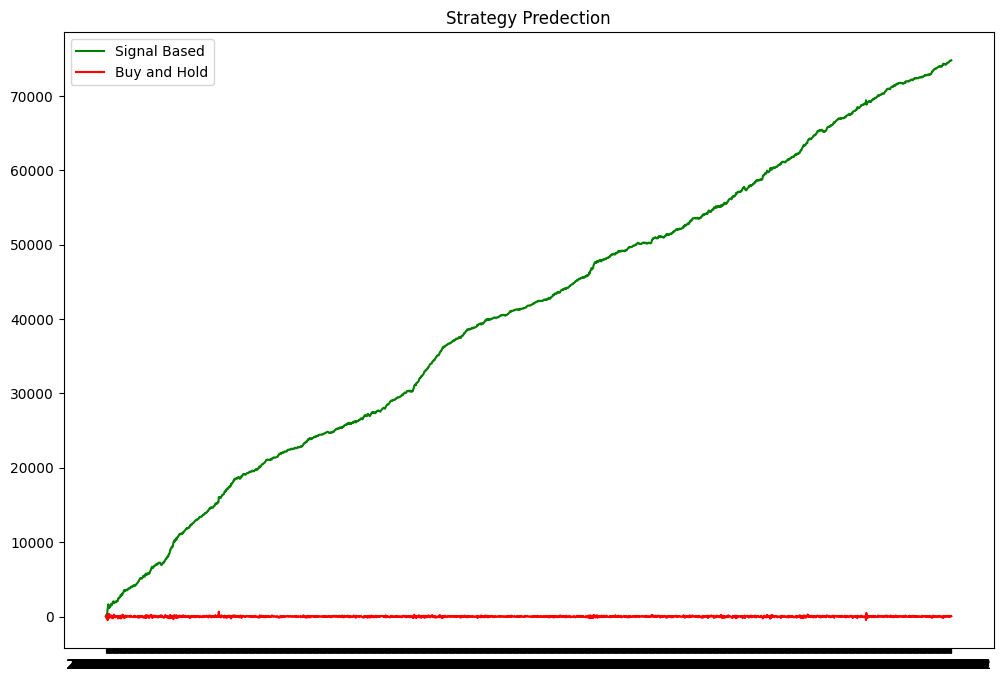

74800.19724500003

In [28]:
plt.figure(figsize=(12,8))
plt.title('Strategy Predection')
plt.plot(Train_res.index, Train_res['Profit'].cumsum(), c='g', label = 'Signal Based')
plt.plot(Train_res.index, Train_res['NIFTY'], c='r', label = 'Buy and Hold')
plt.legend()
plt.show()
Train_res['Profit'].sum()

### Test Data

In [29]:
Test_res['Share'] = [1 if sign > 0 else -1 for sign in Test_res['Pre']]
Test_res['Profit'] = Test_res['NIFTY'] * Test_res['Share']
Test_res

,NIFTY,Pre,Share,Profit
Date,,,,
2017-11-03,21.049805,7.464280,1,21.049805
2017-11-06,-29.799805,23.172631,1,-29.799805
2017-11-07,45.400391,41.160872,1,45.400391
2017-11-08,-115.200196,31.884588,1,-115.200196
2017-11-09,-3.299804,15.682850,1,-3.299804
...,...,...,...,...
2018-08-14,12.100586,11.472055,1,12.100586
2018-08-16,15.450196,-56.413412,-1,-15.450196
2018-08-17,40.000000,58.223130,1,40.000000


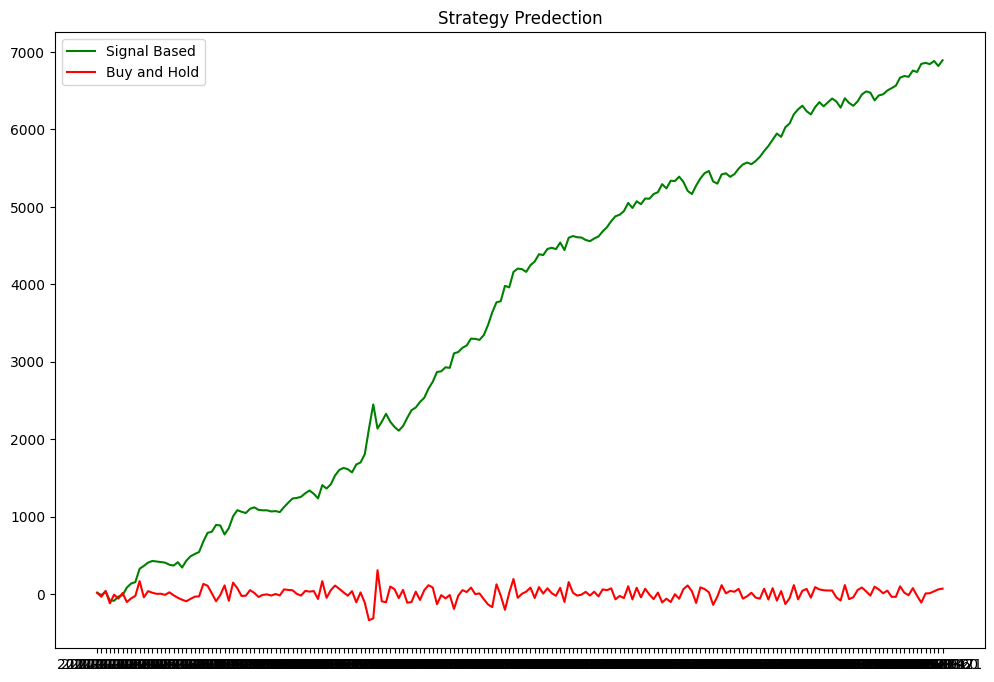

6893.10449299999

In [30]:
plt.figure(figsize=(12,8))
plt.title('Strategy Predection')
plt.plot(Test_res.index, Test_res['Profit'].cumsum(), c='g', label = 'Signal Based')
plt.plot(Test_res.index, Test_res['NIFTY'], c='r', label = 'Buy and Hold')
plt.legend()
plt.show()
Test_res['Profit'].sum()